<h1>Import libraries<h1>

In [1]:
from Model.Decision_Tree_Classifier_from_scratch import *
from Model.Decision_Tree_Regressor_from_scratch import *
from Model.Decision_Tree_optimization_pre_pruning import *
from Model.Decision_Tree_optimization_post_pruning import *
from Metrics.Classification_metrics import *
from Metrics.Regression_metrics import *
from Plots.Prediction_plots import *
Plots_predictions = Prediction_plots()

<h1>Explanation of Decision Tree<h1>

$\text{A decision tree is an algorithm that can be used for both regression and classification problems.}$<p>

$\text{Basic terminology for decision trees:}$<p>
$\text{- Root Nodes - the node located at the beginning of the decision tree, from which the population begins to divide according to various characteristics.}$<p>
$\text{- Decision Nodes - nodes that are obtained after dividing the root nodes.}$<p>
$\text{- Leaf Nodes - nodes for which further division is impossible.}$<p>
$\text{- Sub-tree/branch - a sub-section of the tree (slice).}$<p>
$\text{- Splitting - the process of dividing a node into sub-nodes.}$<p>
$\text{- Pruning - cutting out some nodes to stop excessive matching.}$

<h2>Classification tree<h2>

<h3>Measures of impurity<h3>

$\text{Below, there are two popular measures of impurity with the help of which it is possible to determine the split of nodes for decision trees.}$<p>
$\textbf{Entropy } \text{- uncertainty/measure of disorder resulting from the division of a data set.}$<p>
$$Entropy\left(S\right)=\sum_{k=1}^{K}{-p_k\times\log_2{\left(p_k\right)}}$$
$\text{Where: } S \text{ - analyzed subset of the training set,}$<p>
$K \text{ - number of classes of the explained variable,}$<p>
$p_k \text{ - probability of occurrence of class k.}$<p><br>

$\textbf{Gini Impurity } \text{ - a measure of data imbalance. A value of 0 means that the data is perfectly pure (all elements belong to one class),}$<p>
$\text{a value of 1 means maximum impurity between the data (classes are equally distributed).}$<p>
$$Gini(S)=1-\sum_{k=1}^{K}p_k^2$$
$\text{Where: } S \text{ - the analyzed subset of the training set,}$<p>
$K \text{ - the number of classes of the explained variable,}$<p>
$p_k \text{ - the probability of occurrence of class } k.$<p><br>

$\text{We will always choose a split with a } \textbf{lower impurity } \text{value because we want to minimize node contamination/uncertainty}$<p>
$\text{and aim for a situation where we get only one class in a leaf node.}$

<h3>Information gain and split of tree<h3>

$\textbf{Information Gain } \text{- the expected reduction in impurity caused by the addition of new information.}$<p>
$\text{It helps in deciding into which feature to split our tree at a given node.}$<p>
$\text{The feature (or more precisely, the feature split) that will cause the greatest reduction in impurity at the node is selected.}$<p>
$\text{Information gain is the reduction in variance caused by splitting.}$

$$Information\ Gain\left(S,\ m\right)={Uncertainty}_{Parent}\left(S\right)-{Avg\_Uncertainty}_{Child}(S,m,q)$$

$\text{Where: } S \text{ - analyzed subset of the training set,}$<p>
$m \text{ - variable } m \text{ in the set,}$<p>
$q \text{ - interpolation value against which we divide the node.}$<p>
$\text{The division is chosen for that variable for which Information Gain takes the } \textbf{largest } \text{value.}$<p><br>

$\text{To calculate } {Avg\_Uncertainty}_{Child}(S,m,q) \text{which is average impurity of "children's nodes" we will use the following formula:}$<p>

$${Avg\_Uncertainty}_{Child}(S,m,q)=\frac{n_{subset_1\left(q\right)}}{n_{parent}}\times Uncertainty\left(subset_1\left(q\right)\right)+\frac{n_{subset_2\left(q\right)}}{n_{parent}}\times Uncertainty\left(subset_2\left(q\right)\right)$$

$\text{Where: } n_{subset_1\left(q\right)} \text{ - The abundance of the left child node after splitting relative to the interpolation value of } q,$<p>
$n_{subset_2\left(q\right)} \text{ - the abundance of the right child node after splitting relative to the interpolation value of } q,$<p>
$n_{parent} \text{ - abundance of subset } S \text{ (parent node),}$<p>
$Uncertainty\left(subset_1\left(q\right)\right)\ \text{ - the impurity of the left child node after splitting relative to the interpolation value } q,$<p>
$Uncertainty\left(subset_2\left(q\right)\right)\ \text{ - the impurity of the right child node after splitting relative to the interpolation value } q.$<p><br>

$\text{To maximize } Information\_Gain \text{, that interpolation value of } q \text{ for which } {Avg\_Uncertainty}_{Child}(S,m,q) \text{ takes the } \textbf{smallest } \text{value is selected.}$

<h1>Preprocessing<h1>

<h2>Download data<h2>

In [2]:
data = pd.read_csv("Data/bank-balanced.csv")
X = data.drop("deposit", axis=1)
y = data["deposit"]

In [3]:
print("Number of observations in data: {}".format(len(data)))
data.head()

Number of observations in data: 11162


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


<h2>Check for null data<h2>

In [4]:
data.isnull().sum()/len(data)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64

<h2>Convert object to numeric<h2>

$\text{For decision trees we have to convert object/string features to numeric.}$<p>
$\text{For decision trees, the best option would be to use OridinalEncoding instead of OneHotEncoding because of that algorithm's problem with the curse of dimensionality}$

In [5]:
list_of_object_features_classification = data.select_dtypes(include="object").columns.tolist()
list_of_numeric_features_classification = data.select_dtypes(exclude="object").columns.tolist()
encoder = OrdinalEncoder()
data[list_of_object_features_classification] = encoder.fit_transform(data[list_of_object_features_classification])

<h2>Divide our data into train and test sets<h2>

In [6]:
target_binary = "deposit"
X = data.drop(target_binary, axis=1)
y = data[[target_binary]]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=17, test_size=0.2)

$\text{The huge advantage of decision trees compared to other popular algorithms is that there is no need to scale the data.}$

<h1>Evaluation and Visualization<h1>

$\text{To verify how well our algorithms are able to perform, a cross-validation will be used on the training set (in order to average the results obtained).}$<p>
$\text{Then we will check whether the algorithms will perform equally well (or even better) on the test data.}$

In [7]:
class Cross_Validation():
    def __init__(self, metric, algorithm_instance, cross_validation_instance):
        metrics = {"accuracy": [lambda y, y_pred: accuracy_score(y, y_pred), "preds"],
                    "roc_auc": [lambda y, y_pred: roc_auc_score(y, y_pred), "probs"],
                    "mse": [lambda y, y_pred: mean_squared_error(y, y_pred), "preds"],
                    "rmse": [lambda y, y_pred: mean_squared_error(y, y_pred)**0.5, "preds"],
                    "mae": [lambda y, y_pred: mean_absolute_error(y, y_pred), "preds"]}
        if metric not in metrics:
            raise ValueError('Unsupported metric: {}'.format(metric))
        self.eval_metric = metrics[metric][0]
        self.metric_type = metrics[metric][1]
        self.algorithm = algorithm_instance
        self.cv = cross_validation_instance
    
    def fit(self, X, y, verbose=False):
        X = self.check_X(X=X)
        y = self.check_y(y=y)
        self.train_scores, self.valid_scores = [], []
        for iter, (train_idx, valid_idx) in enumerate(self.cv.split(X, y)):
            X_train, X_valid = X[train_idx, :], X[valid_idx, :]
            y_train, y_valid = y[train_idx], y[valid_idx]
            self.algorithm.fit(X_train, y_train)
            if(self.metric_type == "preds"):
                y_train_pred = self.algorithm.predict(X_train)
                y_valid_pred = self.algorithm.predict(X_valid)
            else:
                y_train_pred = self.algorithm.predict_proba(X_train)[:, 1]
                y_valid_pred = self.algorithm.predict_proba(X_valid)[:, 1]
            self.train_scores.append(self.eval_metric(y_train, y_train_pred))
            self.valid_scores.append(self.eval_metric(y_valid, y_valid_pred))
            if(verbose == True):
                print("Iter {}: train scores: {}; valid scores: {}".format(iter, np.round(self.eval_metric(y_train, y_train_pred), 5), np.round(self.eval_metric(y_valid, y_valid_pred), 5)))
        return np.mean(self.train_scores), np.mean(self.valid_scores)
    
    def check_X(self, X):
        if not isinstance(X, pd.DataFrame) and not isinstance(X, np.ndarray) and not torch.is_tensor(X):
            raise TypeError('Wrong type of X. It should be dataframe, numpy array or torch tensor.')
        X = np.array(X)
        if(X.ndim == 1):
            X = X[None, :]
        return X
    
    def check_y(self, y):
        if not isinstance(y, pd.DataFrame) and not isinstance(y, pd.Series) and not isinstance(y, np.ndarray) and not torch.is_tensor(y):
            raise TypeError('Wrong type of y. It should be pandas DataFrame, pandas Series, numpy array or torch tensor.')
        y = np.array(y)
        if(y.ndim == 2):
            y = y.squeeze()
        return y

In [8]:
model = Decision_Tree_Classifier(criterion="entropy", max_depth=None, min_samples_split=2, max_features=None, random_state=17)
CV = Cross_Validation(metric="roc_auc", algorithm_instance=model, cross_validation_instance=KFold(n_splits=5, shuffle=True, random_state=17))
mean_of_train_scores, mean_of_valid_scores = CV.fit(X=X_train, y=y_train, verbose=True)
print("Mean of train scores: {}; Mean of valid scores: {}".format(np.round(mean_of_train_scores, 5), np.round(mean_of_valid_scores, 5)))

Iter 0: train scores: 0.99993; valid scores: 0.77582
Iter 1: train scores: 0.99991; valid scores: 0.79239
Iter 2: train scores: 0.99992; valid scores: 0.80042
Iter 3: train scores: 0.99994; valid scores: 0.75657
Iter 4: train scores: 0.99991; valid scores: 0.77584
Mean of train scores: 0.99992; Mean of valid scores: 0.78021


$\text{As we can see our algorithm performs really well on training dataset but there is a huge decrease in accuracy for valid dataset.}$<p>
$\text{It means that model is overfitted.}$

$\text{Just to be sure we can check the results for original test dataset.}$

In [9]:
model = Decision_Tree_Classifier(criterion="entropy", max_depth=None, min_samples_split=2, max_features=None, random_state=17)
model.fit(X_train, y_train)
y_prob_train = model.predict_proba(X_train)[:,1]
y_prob_test = model.predict_proba(X_test)[:,1]
print("DecisionTreeClassifier: Train: {}; Test: {}".format(np.round(roc_auc_score(y_train, y_prob_train), 4), np.round(roc_auc_score(y_test, y_prob_test), 4)))

DecisionTreeClassifier: Train: 0.9999; Test: 0.7885


$\text{Write down predictions for the future}$

In [10]:
base_predictions = model.predict(X_test)
base_probabilities = model.predict_proba(X_test)[:, 1]

$\text{We will have to optimize some of our hyperparameters to see whether we can achive better results.}$

<h1>Optimization<h1>

$\textbf{Pruning } \text{ - pruning out nodes to stop over-fitting. Sometimes with a large number of variables and a small dataset,}$<p>
$\text{you may find that the final splits result in leaves containing only a few observations.}$<p>
$\text{While this will allow you to make a prediction on the training set with great accuracy,}$<p>
$\text{the variance of the tree is very large (a small change in the data contributes to a change in the prediction).}$<p><br>

$\text{We divide pruning into a phases:}$<p>
$\textbf{Pre-Pruning: } \text{find optimal values for parameters like: } criterion \text{, } max\_depth \text{, } min\_samples\_split \text{, } max\_features.$<p>
$\text{The best way to find them is by using cross validation.}$<p><br>

$\textbf{Post-Pruning: } \text{after building whole tree we will try to prune it a bit by removing some leaves.}$<p>
$\text{This type of pruning is parameterized by Cost Complexity Parameter: } ccp\_alpha.$

$$Tree\ Score=sum(Error)+\alpha\times leaves$$

$\text{Where: } sum(Error) \text{- the sum value of the loss (for regression it can be MSE, and for classification Entropy, or Gini),}$<p>
$leaves \text{ - the number of leaves in the tree.}$<p>
$\text{The tree of optimal size will be the one for which } Tree\_Score \text{ takes the } \textbf{smallest } \text{value.}$<p>
$\text{The value of } \alpha \text{ will be different for different datasets.}$

$\text{To perform optimization we will use sklearn DecisionTrees just because of faster compilation time.}$

<h3>Pre-Pruning<h3>

$\text{Firstly, let's find out for which criterion Decision Tree performs better.}$<p>
$criterion \ ["gini", \ "entropy"]:$<p>
$\text{"gini" tends to select splits that result in a more balanced class distribution.}$<p>
$\text{"entropy" tends to select splits that result in a greater reduction in uncertainty.}$

In [11]:
model = DecisionTreeClassifier(random_state=17)
CV = Cross_Validation_Decision_Tree_pre_pruning(metric="roc_auc", algorithm_instance=model, cross_validation_instance=KFold(n_splits=5, shuffle=True, random_state=17))
for criterion_type in ["entropy", "gini"]:
    mean_of_train_scores, mean_of_valid_scores = CV.fit(X=X_train, y=y_train, verbose=False, criterion=criterion_type)
    print("Criterion: {}; Mean of train scores: {}; Mean of valid scores: {}".format(criterion_type, np.round(mean_of_train_scores, 5), np.round(mean_of_valid_scores, 5)))

Criterion: entropy; Mean of train scores: 1.0; Mean of valid scores: 0.78181
Criterion: gini; Mean of train scores: 1.0; Mean of valid scores: 0.77545


$\text{Better results are obtained for "entropy" criterion.}$

$\text{Secondly, let's find out for which values of } max\_depth \text{ we will get the best results}$<p>
$max\_depth \ [int]: \text{ is used to control the depth of the tree (its downward expansion).}$<p>
$\text{The greater the depth of the tree, the greater the likelihood of overfitting.}$<p>
$\text{Too low a depth, on the other hand, can lead to underfitting.}$

In [12]:
model = DecisionTreeClassifier(random_state=17, criterion="entropy")
CV = Cross_Validation_Decision_Tree_pre_pruning(metric="roc_auc", algorithm_instance=model, cross_validation_instance=KFold(n_splits=5, shuffle=True, random_state=17))
for max_depth_value in range(2,22,2):
    mean_of_train_scores, mean_of_valid_scores = CV.fit(X=X_train, y=y_train, verbose=False, max_depth=max_depth_value)
    print("Max depth: {}; Mean of train scores: {}; Mean of valid scores: {}".format(max_depth_value, np.round(mean_of_train_scores, 5), np.round(mean_of_valid_scores, 5)))

Max depth: 2; Mean of train scores: 0.77924; Mean of valid scores: 0.7754
Max depth: 4; Mean of train scores: 0.85263; Mean of valid scores: 0.84668
Max depth: 6; Mean of train scores: 0.89454; Mean of valid scores: 0.87322
Max depth: 8; Mean of train scores: 0.92741; Mean of valid scores: 0.87477
Max depth: 10; Mean of train scores: 0.95751; Mean of valid scores: 0.85697
Max depth: 12; Mean of train scores: 0.97986; Mean of valid scores: 0.83038
Max depth: 14; Mean of train scores: 0.99258; Mean of valid scores: 0.81563
Max depth: 16; Mean of train scores: 0.99779; Mean of valid scores: 0.79715
Max depth: 18; Mean of train scores: 0.99945; Mean of valid scores: 0.78655
Max depth: 20; Mean of train scores: 0.99986; Mean of valid scores: 0.78352


$\text{The biggest valid score was obtained for } max\_depth=8$

$\text{Now let's tune } max\_features$<p>
$max\_features \left[int,"sqrt","log2"\right]: \text{ defines the number of variables considered that will be taken into account when performing the split.}$<p>
$\text{The variables are chosen randomly. It is assumed that the appropriate number of variables to be considered is the root of all of them (the "sqrt" option).}$<p>
$\text{The fewer variables to check, the shorter the compilation.}$<p>
$\text{On the other hand, probability increases that we will not choose the most optimal variable at a given node, which can reduce the effectiveness of the algorithm.}$

In [13]:
model = DecisionTreeClassifier(random_state=17, criterion="entropy", max_depth=8)
CV = Cross_Validation_Decision_Tree_pre_pruning(metric="roc_auc", algorithm_instance=model, cross_validation_instance=KFold(n_splits=5, shuffle=True, random_state=17))
list_of_possible_max_features = [i for i in range(2, X_train.shape[1]+1, 2)]+["sqrt"]+["log2"]
for features_number in list_of_possible_max_features:
    mean_of_train_scores, mean_of_valid_scores = CV.fit(X=X_train, y=y_train, verbose=False, max_features=features_number)
    print("Max Features: {}; Mean of train scores: {}; Mean of valid scores: {}".format(features_number, np.round(mean_of_train_scores, 5), np.round(mean_of_valid_scores, 5)))

Max Features: 2; Mean of train scores: 0.82234; Mean of valid scores: 0.7734
Max Features: 4; Mean of train scores: 0.86523; Mean of valid scores: 0.81471
Max Features: 6; Mean of train scores: 0.91189; Mean of valid scores: 0.85607
Max Features: 8; Mean of train scores: 0.9233; Mean of valid scores: 0.86624
Max Features: 10; Mean of train scores: 0.92571; Mean of valid scores: 0.87134
Max Features: 12; Mean of train scores: 0.92543; Mean of valid scores: 0.87495
Max Features: 14; Mean of train scores: 0.92729; Mean of valid scores: 0.87055
Max Features: 16; Mean of train scores: 0.92741; Mean of valid scores: 0.87477
Max Features: sqrt; Mean of train scores: 0.86523; Mean of valid scores: 0.81471
Max Features: log2; Mean of train scores: 0.86523; Mean of valid scores: 0.81471


$\text{The biggest valid score was obtained for } max\_features=12$

$\text{Final parameter for tuning will be } min\_samples\_split$<p>
$min\_samples\_split \ [int]: \text{defines the minimum number of observations that are required for a given node to be split.}$<p>
$\text{The higher the } min\_samples\_split \text{ value, the higher the model can split the data into smaller and smaller samples causing the tree to learn specific patterns increasing the probability of overfitting.}$<p>
$\text{Too high values, on the other hand, can lead to underfitting.}$<p>
$min\_samples\_split \text{ should not be higher than } 0.05\times N \text{ (where: N - number of observations)}$<p>
$\text{Higher values will lead to underfitting.}$

In [14]:
model = DecisionTreeClassifier(random_state=17, criterion="entropy", max_depth=8, max_features=12)
CV = Cross_Validation_Decision_Tree_pre_pruning(metric="roc_auc", algorithm_instance=model, cross_validation_instance=KFold(n_splits=5, shuffle=True, random_state=17))
for samples in range(2, int(0.05*X_train.shape[0]), 20):
    mean_of_train_scores, mean_of_valid_scores = CV.fit(X=X_train, y=y_train, verbose=False, min_samples_split=samples)
    print("Min Samples Split: {}; Mean of train scores: {}; Mean of valid scores: {}".format(samples, np.round(mean_of_train_scores, 5), np.round(mean_of_valid_scores, 5)))

Min Samples Split: 2; Mean of train scores: 0.92543; Mean of valid scores: 0.87495
Min Samples Split: 22; Mean of train scores: 0.92155; Mean of valid scores: 0.87696
Min Samples Split: 42; Mean of train scores: 0.91875; Mean of valid scores: 0.87924
Min Samples Split: 62; Mean of train scores: 0.91579; Mean of valid scores: 0.88566
Min Samples Split: 82; Mean of train scores: 0.91586; Mean of valid scores: 0.88362
Min Samples Split: 102; Mean of train scores: 0.91294; Mean of valid scores: 0.88531
Min Samples Split: 122; Mean of train scores: 0.91209; Mean of valid scores: 0.88734
Min Samples Split: 142; Mean of train scores: 0.90871; Mean of valid scores: 0.88536
Min Samples Split: 162; Mean of train scores: 0.90999; Mean of valid scores: 0.88485
Min Samples Split: 182; Mean of train scores: 0.90722; Mean of valid scores: 0.88413
Min Samples Split: 202; Mean of train scores: 0.90588; Mean of valid scores: 0.88304
Min Samples Split: 222; Mean of train scores: 0.90363; Mean of valid sc

$\text{We can take a closer look for range: } [50, 150]$

In [15]:
model = DecisionTreeClassifier(random_state=17, criterion="entropy", max_depth=8, max_features=12)
CV = Cross_Validation_Decision_Tree_pre_pruning(metric="roc_auc", algorithm_instance=model, cross_validation_instance=KFold(n_splits=5, shuffle=True, random_state=17))
for samples in range(50, 150, 5):
    mean_of_train_scores, mean_of_valid_scores = CV.fit(X=X_train, y=y_train, verbose=False, min_samples_split=samples)
    print("Min Samples Split: {}; Mean of train scores: {}; Mean of valid scores: {}".format(samples, np.round(mean_of_train_scores, 5), np.round(mean_of_valid_scores, 5)))

Min Samples Split: 50; Mean of train scores: 0.91779; Mean of valid scores: 0.88362
Min Samples Split: 55; Mean of train scores: 0.91655; Mean of valid scores: 0.88136
Min Samples Split: 60; Mean of train scores: 0.91581; Mean of valid scores: 0.88648
Min Samples Split: 65; Mean of train scores: 0.91509; Mean of valid scores: 0.88346
Min Samples Split: 70; Mean of train scores: 0.91719; Mean of valid scores: 0.88153
Min Samples Split: 75; Mean of train scores: 0.9167; Mean of valid scores: 0.88304
Min Samples Split: 80; Mean of train scores: 0.91627; Mean of valid scores: 0.88431
Min Samples Split: 85; Mean of train scores: 0.91593; Mean of valid scores: 0.88436
Min Samples Split: 90; Mean of train scores: 0.91541; Mean of valid scores: 0.88417
Min Samples Split: 95; Mean of train scores: 0.91339; Mean of valid scores: 0.88392
Min Samples Split: 100; Mean of train scores: 0.91348; Mean of valid scores: 0.8853
Min Samples Split: 105; Mean of train scores: 0.91251; Mean of valid scores: 

$\text{Differences are not that big but it seems like best valid score was obtained for } min\_samples\_split=120$

<h3>Post-Pruning<h3>

In [16]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=None, max_features=None, min_samples_split=2, random_state=17)
CV = Cross_Validation_Decision_Tree_post_pruning(metric="roc_auc", algorithm_instance=model, cross_validation_instance=KFold(n_splits=5, shuffle=True, random_state=17))

$\text{The first thing to examine are graphs of how the depth or number of nodes in the tree changes for different values of the } ccp\_alpha \text{ parameter.}$

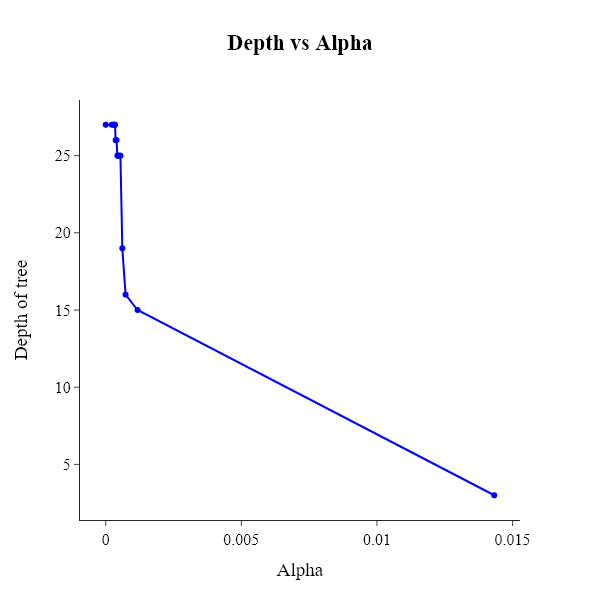

In [17]:
CV.compare_depth_and_alpha(X=X_train, y=y_train)

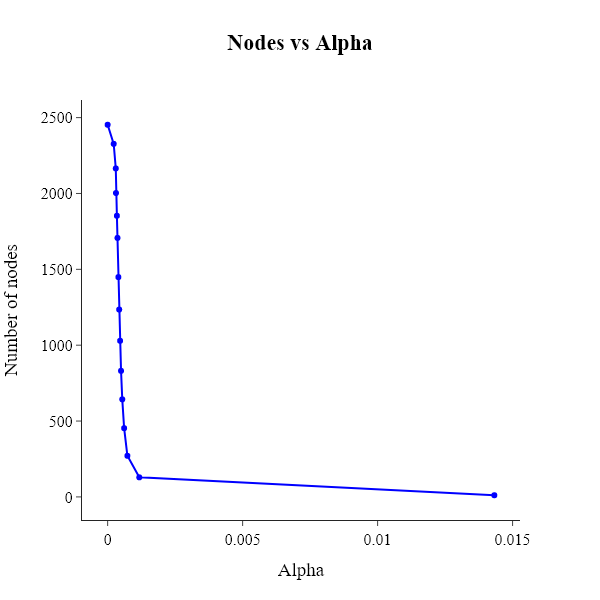

In [18]:
CV.compare_nodes_and_alpha(X=X_train, y=y_train)

$\text{Now let's find out using cross validation what are mean train and valid scores for different values of } ccp\_alpha$

ccp_alpha=0.0: train scores: 1.0; valid scores: 0.78181
ccp_alpha=0.00022: train scores: 1.0; valid scores: 0.78191
ccp_alpha=0.0003: train scores: 0.9999; valid scores: 0.78679
ccp_alpha=0.00031: train scores: 0.99988; valid scores: 0.78711
ccp_alpha=0.00034: train scores: 0.99968; valid scores: 0.78834
ccp_alpha=0.00036: train scores: 0.99951; valid scores: 0.78866
ccp_alpha=0.0004: train scores: 0.99839; valid scores: 0.79561
ccp_alpha=0.00043: train scores: 0.99738; valid scores: 0.79899
ccp_alpha=0.00046: train scores: 0.99505; valid scores: 0.80592
ccp_alpha=0.0005: train scores: 0.99252; valid scores: 0.80957
ccp_alpha=0.00054: train scores: 0.9867; valid scores: 0.82155
ccp_alpha=0.00061: train scores: 0.97412; valid scores: 0.84612
ccp_alpha=0.00073: train scores: 0.95431; valid scores: 0.86616
ccp_alpha=0.00117: train scores: 0.92237; valid scores: 0.89576
ccp_alpha=0.01432: train scores: 0.83074; valid scores: 0.828


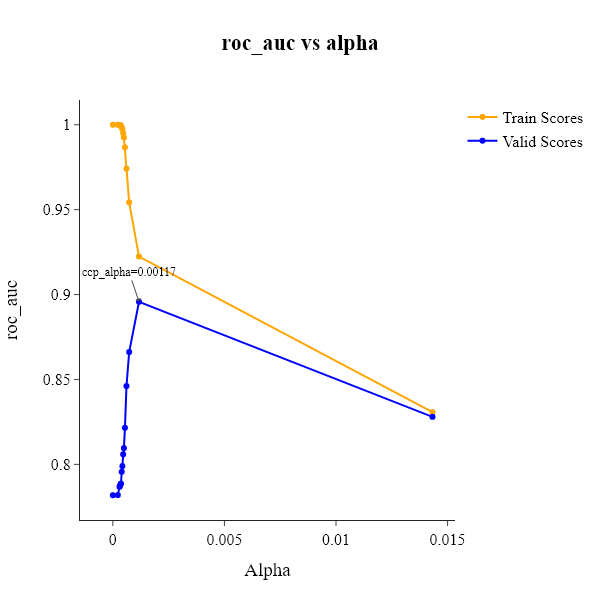

In [19]:
CV.compare_scores_and_alpha(X=X_train, y=y_train, verbose=True)

$\text{We can see that the best value for valid score is obtained for } ccp\_alpha=0.00117$<p>
$\text{Right now we can take a closer look for range: } [0.001, 0.002]$

ccp_alpha=0.00101: train scores: 0.92956; valid scores: 0.88911
ccp_alpha=0.00101: train scores: 0.92912; valid scores: 0.89012
ccp_alpha=0.00103: train scores: 0.92849; valid scores: 0.89028
ccp_alpha=0.00103: train scores: 0.92849; valid scores: 0.89028
ccp_alpha=0.00103: train scores: 0.92849; valid scores: 0.89028
ccp_alpha=0.00105: train scores: 0.92778; valid scores: 0.89153
ccp_alpha=0.00105: train scores: 0.92778; valid scores: 0.89153
ccp_alpha=0.0011: train scores: 0.92472; valid scores: 0.89406
ccp_alpha=0.00111: train scores: 0.92465; valid scores: 0.89409
ccp_alpha=0.00112: train scores: 0.92418; valid scores: 0.89457
ccp_alpha=0.00117: train scores: 0.92262; valid scores: 0.89553
ccp_alpha=0.00118: train scores: 0.92232; valid scores: 0.89584
ccp_alpha=0.00121: train scores: 0.92094; valid scores: 0.89684
ccp_alpha=0.00122: train scores: 0.92051; valid scores: 0.89708
ccp_alpha=0.00126: train scores: 0.91966; valid scores: 0.89711
ccp_alpha=0.00127: train scores: 0.91951;

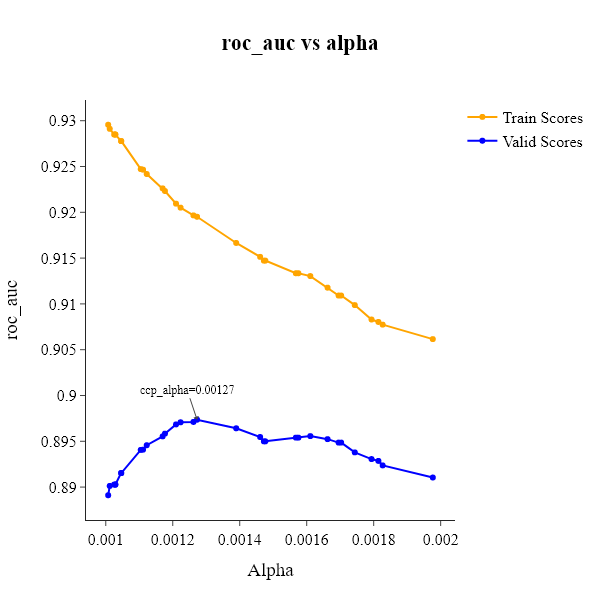

In [20]:
CV.cv_for_range_of_alpha(X=X_train, y=y_train, min_alpha=0.001, max_alpha=0.002, verbose=True)

<h1>Evaluation<h1>

In [21]:
print("Balance accuracy score: {}".format(np.round(balanced_accuracy_score(y_true=y_test, y_pred=base_predictions), 5)))
print("Roc AUC score: {}".format(np.round(roc_auc_score(y_true=y_test, y_score=base_probabilities), 5)))
report = classification_report(y_test, base_predictions, output_dict=True)
df = pd.DataFrame(report).transpose()
print(tabulate(df, headers="keys", tablefmt = 'psql'))

Balance accuracy score: 0.78584
Roc AUC score: 0.78846
+--------------+-------------+----------+------------+-------------+
|              |   precision |   recall |   f1-score |     support |
|--------------+-------------+----------+------------+-------------|
| 0.0          |    0.783514 | 0.81331  |   0.798134 | 1157        |
| 1.0          |    0.790698 | 0.758364 |   0.774194 | 1076        |
| accuracy     |    0.786834 | 0.786834 |   0.786834 |    0.786834 |
| macro avg    |    0.787106 | 0.785837 |   0.786164 | 2233        |
| weighted avg |    0.786975 | 0.786834 |   0.786598 | 2233        |
+--------------+-------------+----------+------------+-------------+


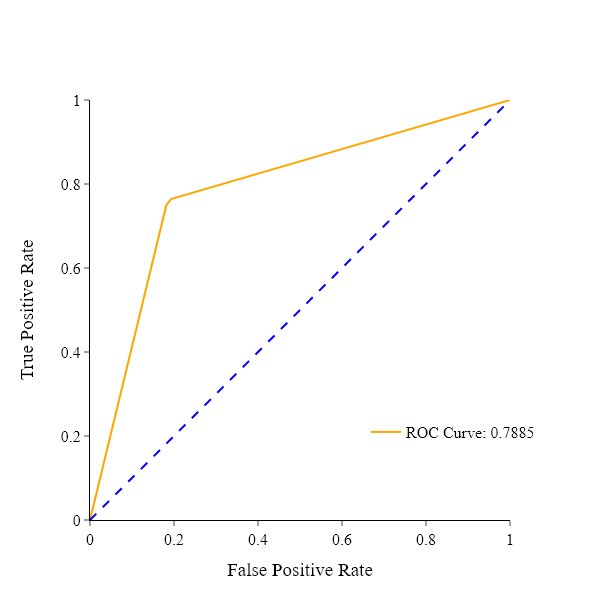

In [22]:
Plots_predictions.roc_auc_plot(y_true=y_test, y_prob=base_probabilities)

$\text{Final estimator pre pruning: } criterion="entropy", \ max\_depth=8, \ max\_features=12, \ min\_samples\_split=120$

In [23]:
final_algorithm_pre_pruning = DecisionTreeClassifier(criterion="entropy", max_depth=8, max_features=12, min_samples_split=120, random_state=17)
final_algorithm_pre_pruning.fit(X_train, y_train)
y_pred_final_pre_pruning = final_algorithm_pre_pruning.predict(X_test)
y_prob_final_pre_pruning = final_algorithm_pre_pruning.predict_proba(X_test)[:, 1]
print("Balance accuracy score: {}".format(np.round(balanced_accuracy_score(y_true=y_test, y_pred=y_pred_final_pre_pruning), 5)))
print("Roc AUC score: {}".format(np.round(roc_auc_score(y_true=y_test, y_score=y_prob_final_pre_pruning), 5)))
report = classification_report(y_test, y_pred_final_pre_pruning, output_dict=True)
df = pd.DataFrame(report).transpose()
print(tabulate(df, headers="keys", tablefmt = 'psql'))

Balance accuracy score: 0.83107
Roc AUC score: 0.89584
+--------------+-------------+----------+------------+-------------+
|              |   precision |   recall |   f1-score |     support |
|--------------+-------------+----------+------------+-------------|
| 0.0          |    0.855576 | 0.808989 |   0.83163  | 1157        |
| 1.0          |    0.80597  | 0.85316  |   0.828894 | 1076        |
| accuracy     |    0.830273 | 0.830273 |   0.830273 |    0.830273 |
| macro avg    |    0.830773 | 0.831074 |   0.830262 | 2233        |
| weighted avg |    0.831673 | 0.830273 |   0.830312 | 2233        |
+--------------+-------------+----------+------------+-------------+


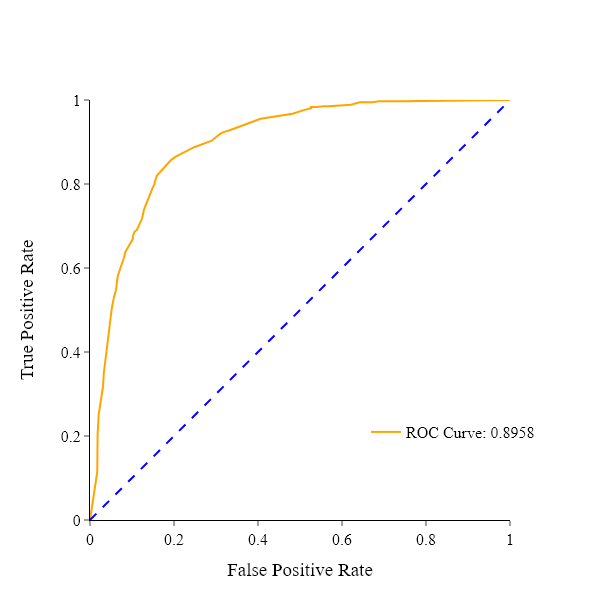

In [24]:
Plots_predictions.roc_auc_plot(y_true=y_test, y_prob=y_prob_final_pre_pruning)

$\text{Final estimator post pruning: } ccp\_alpha=0.00127$

In [25]:
final_algorithm_post_pruning = DecisionTreeClassifier(criterion="entropy", ccp_alpha=0.00127, random_state=17)
final_algorithm_post_pruning.fit(X_train, y_train)
y_pred_final_post_pruning = final_algorithm_post_pruning.predict(X_test)
y_prob_final_post_pruning = final_algorithm_post_pruning.predict_proba(X_test)[:, 1]
print("Balance accuracy score: {}".format(np.round(balanced_accuracy_score(y_true=y_test, y_pred=y_pred_final_post_pruning), 5)))
print("Roc AUC score: {}".format(np.round(roc_auc_score(y_true=y_test, y_score=y_prob_final_post_pruning), 5)))
report = classification_report(y_test, y_pred_final_post_pruning, output_dict=True)
df = pd.DataFrame(report).transpose()
print(tabulate(df, headers="keys", tablefmt = 'psql'))

Balance accuracy score: 0.83815
Roc AUC score: 0.90454
+--------------+-------------+----------+------------+-------------+
|              |   precision |   recall |   f1-score |     support |
|--------------+-------------+----------+------------+-------------|
| 0.0          |    0.860909 | 0.818496 |   0.839167 | 1157        |
| 1.0          |    0.814651 | 0.857807 |   0.835672 | 1076        |
| accuracy     |    0.837438 | 0.837438 |   0.837438 |    0.837438 |
| macro avg    |    0.83778  | 0.838151 |   0.83742  | 2233        |
| weighted avg |    0.838619 | 0.837438 |   0.837483 | 2233        |
+--------------+-------------+----------+------------+-------------+


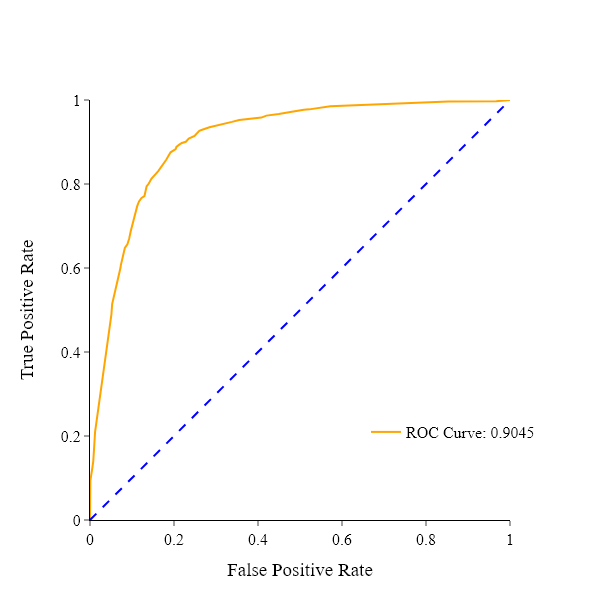

In [26]:
Plots_predictions.roc_auc_plot(y_true=y_test, y_prob=y_prob_final_post_pruning)

$\text{As we can see both pruning methods have significantly improved the effectiveness of the decision tree!}$

<h2>Regression tree<h2>

$\text{For regression, the scheme looks very similar to that for classification.}$<p>
$\text{The obvious difference will be the criterion by which we will make the division.}$<p>
$\text{In this case, the most commonly used are:}$<p>
$\text{- Mean squared error: } MSE=\frac{1}{N}\times\sum_{i=1}^{N}\left(y_i-{\hat{y}}_i\right)^2$<p>
$\text{- Mean absolute error: } MAE=\frac{1}{N}\times\sum_{i=1}^{N}\left|y_i-{\hat{y}}_i\right|$<p><br>

$\text{The value of } {\hat{y}}_i \text{ is determined as:}$<p>

$${\hat{y}}_i=\frac{1}{N}\times\sum_{i=1}^{N}y_i$$

$\text{So it is simply the average value from all the observations that go to the node.}$<p>
$\text{If we wanted to write down the rule by which we find the best distribution of a node, it would be the largest possible reduction in error:}$<p>

$$Reduction\left(S,\ m\right)={Error}_{Parent}\left(S\right)-{Avg\ Error}_{Child}\left(S,m,q\right)$$

$\text{Where: } S \text{ - analyzed subset of the training set,}$<p>
$m \text{ - variable } m \text{ in the set,}$<p>
$q \text{ - interpolation value against which we divide the node.}$<p><br>

$${Avg\ Error}_{Child}\left(S,m,\ q\right)=\frac{n_{subset_1\left(q\right)}}{n_{parent}}\times Error\left(subset_1\left(q\right)\right)+\frac{n_{subset_2\left(q\right)}}{n_{parent}}\times Error\left(subset_2\left(q\right)\right)$$

$\text{Where: } n_{subset_1\left(q\right)} \text{ - The abundance of the left child node after splitting relative to the interpolation value of } q,$<p>
$n_{subset_2\left(q\right)} \text{ - the abundance of the right child node after splitting relative to the interpolation value of } q,$<p>
$n_{parent} \text{ - abundance of subset } S \text{ (parent node),}$<p>
$Error\left(subset_1\left(q\right)\right)\ \text{ - the entropy of the left child node after splitting relative to the interpolation value } q,$<p>
$Error\left(subset_2\left(q\right)\right) \text{ - entropy of the right child node after splitting relative to the interpolation value of } q,$

<h1>Preprocessing<h1>

<h2>Download data<h2>

In [27]:
data = pd.read_csv("Data/Sales.csv")
X = data.drop("Sales", axis=1)
y = data["Sales"]

In [28]:
print("Number of observations in data: {}".format(len(data)))
data.head()

Number of observations in data: 4572


,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


<h2>Check for null data<h2>

In [29]:
data.isnull().sum()/len(data)

TV              0.002187
Radio           0.000875
Social Media    0.001312
Influencer      0.000000
Sales           0.001312
dtype: float64

In [30]:
data.dropna(inplace=True)

<h2>Convert object to numeric<h2>

In [31]:
list_of_object_features = data.select_dtypes(include="object").columns.tolist()
list_of_numeric_features = data.select_dtypes(exclude="object").columns.tolist()
encoder = OrdinalEncoder()
data[list_of_object_features] = encoder.fit_transform(data[list_of_object_features])

<h2>Divide our data into train and test sets<h2>

In [32]:
target_binary = "Sales"
X = data.drop(target_binary, axis=1)
y = data[[target_binary]]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=17, test_size=0.2)

<h1>Evaluation and Visualization<h1>

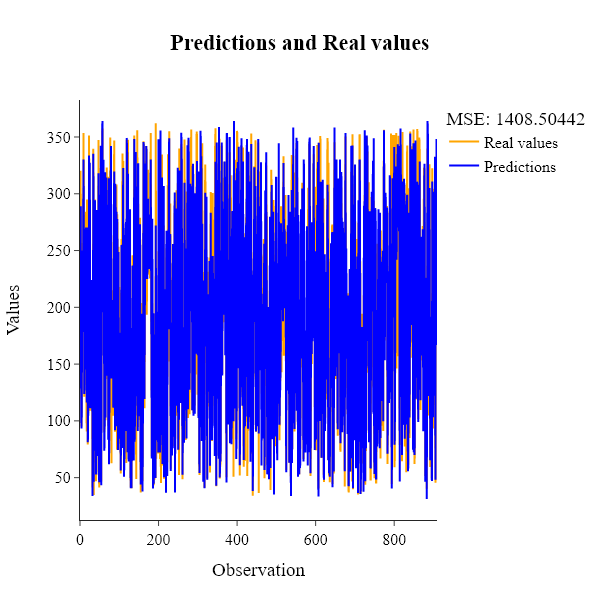

In [33]:
model = Decision_Tree_Regressor(criterion="squared_error", max_depth=None, max_features="sqrt", min_samples_split=2, random_state=17)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
Plots_predictions.compare_predictions_with_real_values(y_true=y_test, y_pred=y_pred, metric="MSE")

<h2>Features importance<h2>

$\text{The features importance is determined by calculating the impurities of each node at which the variable participated in the distribution.}$<p>
$\text{Thus, the significance of each node should be determined at the beginning:}$

$$node\_importance_i=\frac{n_{node}}{N}\times\left({Error}_i-\frac{n_{subset_1}}{n_{node}}\times E r r o r\left(subset_1\right)-\frac{n_{subset_2}}{n_{node}}\times E r r o r\left(subset_2\right)\right)$$

$\text{Where: } n_{node} \text{ - abundance in a node,}$<p>
$N \text{ - the number of observations in the entire analyzed dataset,}$<p>
${Error}_i \text{ - the error in the node,}$<p>
$n_{subset_1} \text{ - abundance of the left child node after subsetting,}$<p>
$Error\left(subset_1\right)  \text{ - error in the left child node after splitting,}$<p>
$n_{subset_2} \text{ - abundance of the right child node after splitting,}$<p>
$Error\left(subset_2\right) \text{ - error in the right child node after splitting.}$<p><br>

$\text{Since there can be many splits for each variable, the formula for the relevance of a single feature will be as follows:}$

$$feature\_importnace_m=\frac{\sum_{i\in n o d e\ splits\ on\ feature\ m}{node\_importance_i}}{\sum_{k\in a l l\ nodes}{node\_importance_k}}$$

$\text{Due to the diversity of the datasets, it is worth considering normalizing the significance of the variables:}$

$$norm\left(feature\_importnace_m\right)=\frac{feature\_importnace_m}{\sum_{k\in a l l\ features}{feature\_importnace_k}}$$

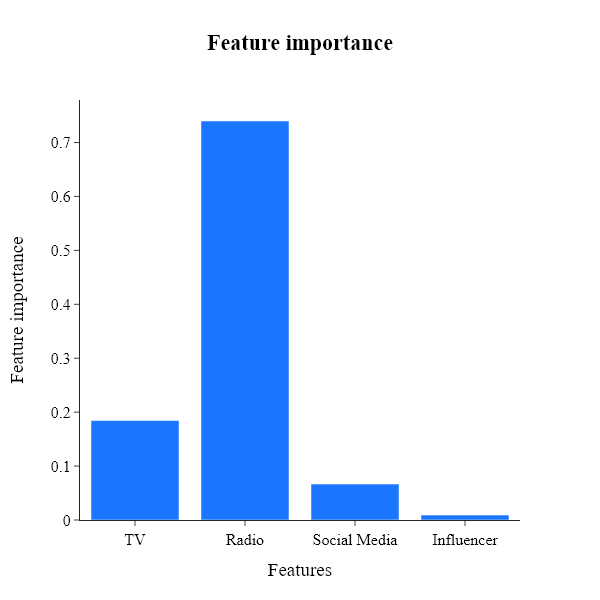

In [34]:
Plots_predictions.plot_feature_importances(feature_importances=list(model.normalized_feature_importances.values()), column_names=X.columns.tolist())

<h1>Advantages and disadvantages of Decision Trees<h1>

$\text{Advantages of Decision Trees:}$<p>
$\text{- Simplicity of interpreting the results obtained by tracing the successive rules/divisions appearing in our tree,}$<p>
$\text{- Capture non-linear patterns well,}$<p>
$\text{- Can be used for feature engineering, such as predicting missing values, Also suitable for variable selection.}$<br>

$\text{Disadvantages of Decision Trees:}$<p>
$\text{- High susceptibility to overfitting (this can be reduced with bagging and boosting algorithms),}$<p>
$\text{- Low variance of data can result in different decision trees, }$<p>
$\text{- Decision trees are biased by unbalanced datasets, so it is recommended to balance the dataset (e.g. oversampling or undersampling) before creating a decision tree.}$